In [3]:
import io
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure

In [4]:
image_pixels = io.imread("sobel/vscode.png")
image_pixels.shape

(600, 800, 4)

In [5]:
if image_pixels.shape[-1] == 4:
    image_pixels = image_pixels[..., :3]  # discard alpha

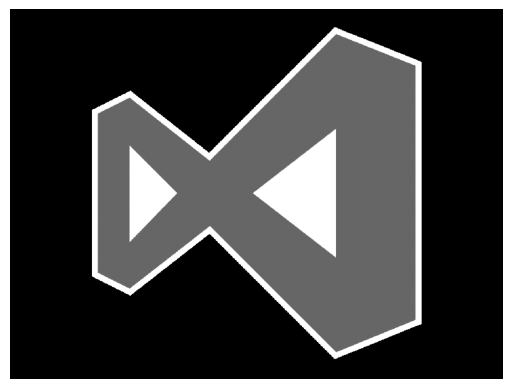

In [6]:
gray_img = color.rgb2gray(image_pixels)
plt.imshow(gray_img, cmap="gray")
plt.axis("off")
plt.show()

In [7]:
edge_sobel = filters.sobel(gray_img)
edge_sobel.shape

(600, 800)

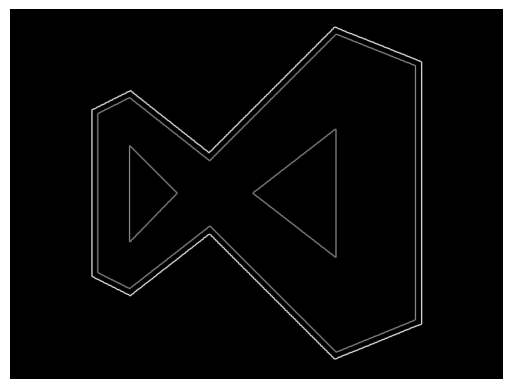

In [ ]:
from skimage.util import img_as_ubyte

io.imsave("sobel/edge_sobel.png", img_as_ubyte(edge_sobel))

plt.imshow(edge_sobel, cmap="gray")
plt.axis("off")
plt.show()

In [9]:
threshold = 0.2
edges = edge_sobel > threshold
edges[200:225, 300:325]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],


In [10]:
edge_pixel_indices = np.nonzero(edges)
edge_pixel_indices

(array([ 28,  28,  28, ..., 568, 568, 568], shape=(11065,)),
 array([526, 527, 528, ..., 526, 527, 528], shape=(11065,)))

In [11]:
edges[104,572]

np.False_

In [12]:
edge_points = np.column_stack(np.nonzero(edges))
edge_points[:3]

array([[ 28, 526],
       [ 28, 527],
       [ 28, 528]])

In [13]:
contours = measure.find_contours(edges, level=0.5)
contours

[array([[568.5, 528. ],
        [568.5, 527. ],
        [568.5, 526. ],
        ...,
        [567.5, 529. ],
        [568. , 528.5],
        [568.5, 528. ]], shape=(2555, 2)),
 array([[565. , 529.5],
        [564.5, 530. ],
        [564. , 530.5],
        ...,
        [565.5, 528. ],
        [565.5, 529. ],
        [565. , 529.5]], shape=(2535, 2)),
 array([[556.5, 531. ],
        [556.5, 530. ],
        [556.5, 529. ],
        ...,
        [555.5, 532. ],
        [556. , 531.5],
        [556.5, 531. ]], shape=(2477, 2)),
 array([[554. , 530.5],
        [553.5, 531. ],
        [553.5, 532. ],
        ...,
        [554.5, 529. ],
        [554.5, 530. ],
        [554. , 530.5]], shape=(2459, 2)),
 array([[403.5, 528. ],
        [403. , 527.5],
        [402.5, 527. ],
        ...,
        [402.5, 529. ],
        [403. , 528.5],
        [403.5, 528. ]], shape=(693, 2)),
 array([[400. , 527.5],
        [399. , 527.5],
        [398. , 527.5],
        ...,
        [400. , 526.5],
        [400